In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

## A

In [2]:
glass_data = pd.read_csv('glass.csv')
glass_data = glass_data.drop('Id', axis=1)

X, y = glass_data.drop('Type', axis=1), glass_data.Type
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=42)

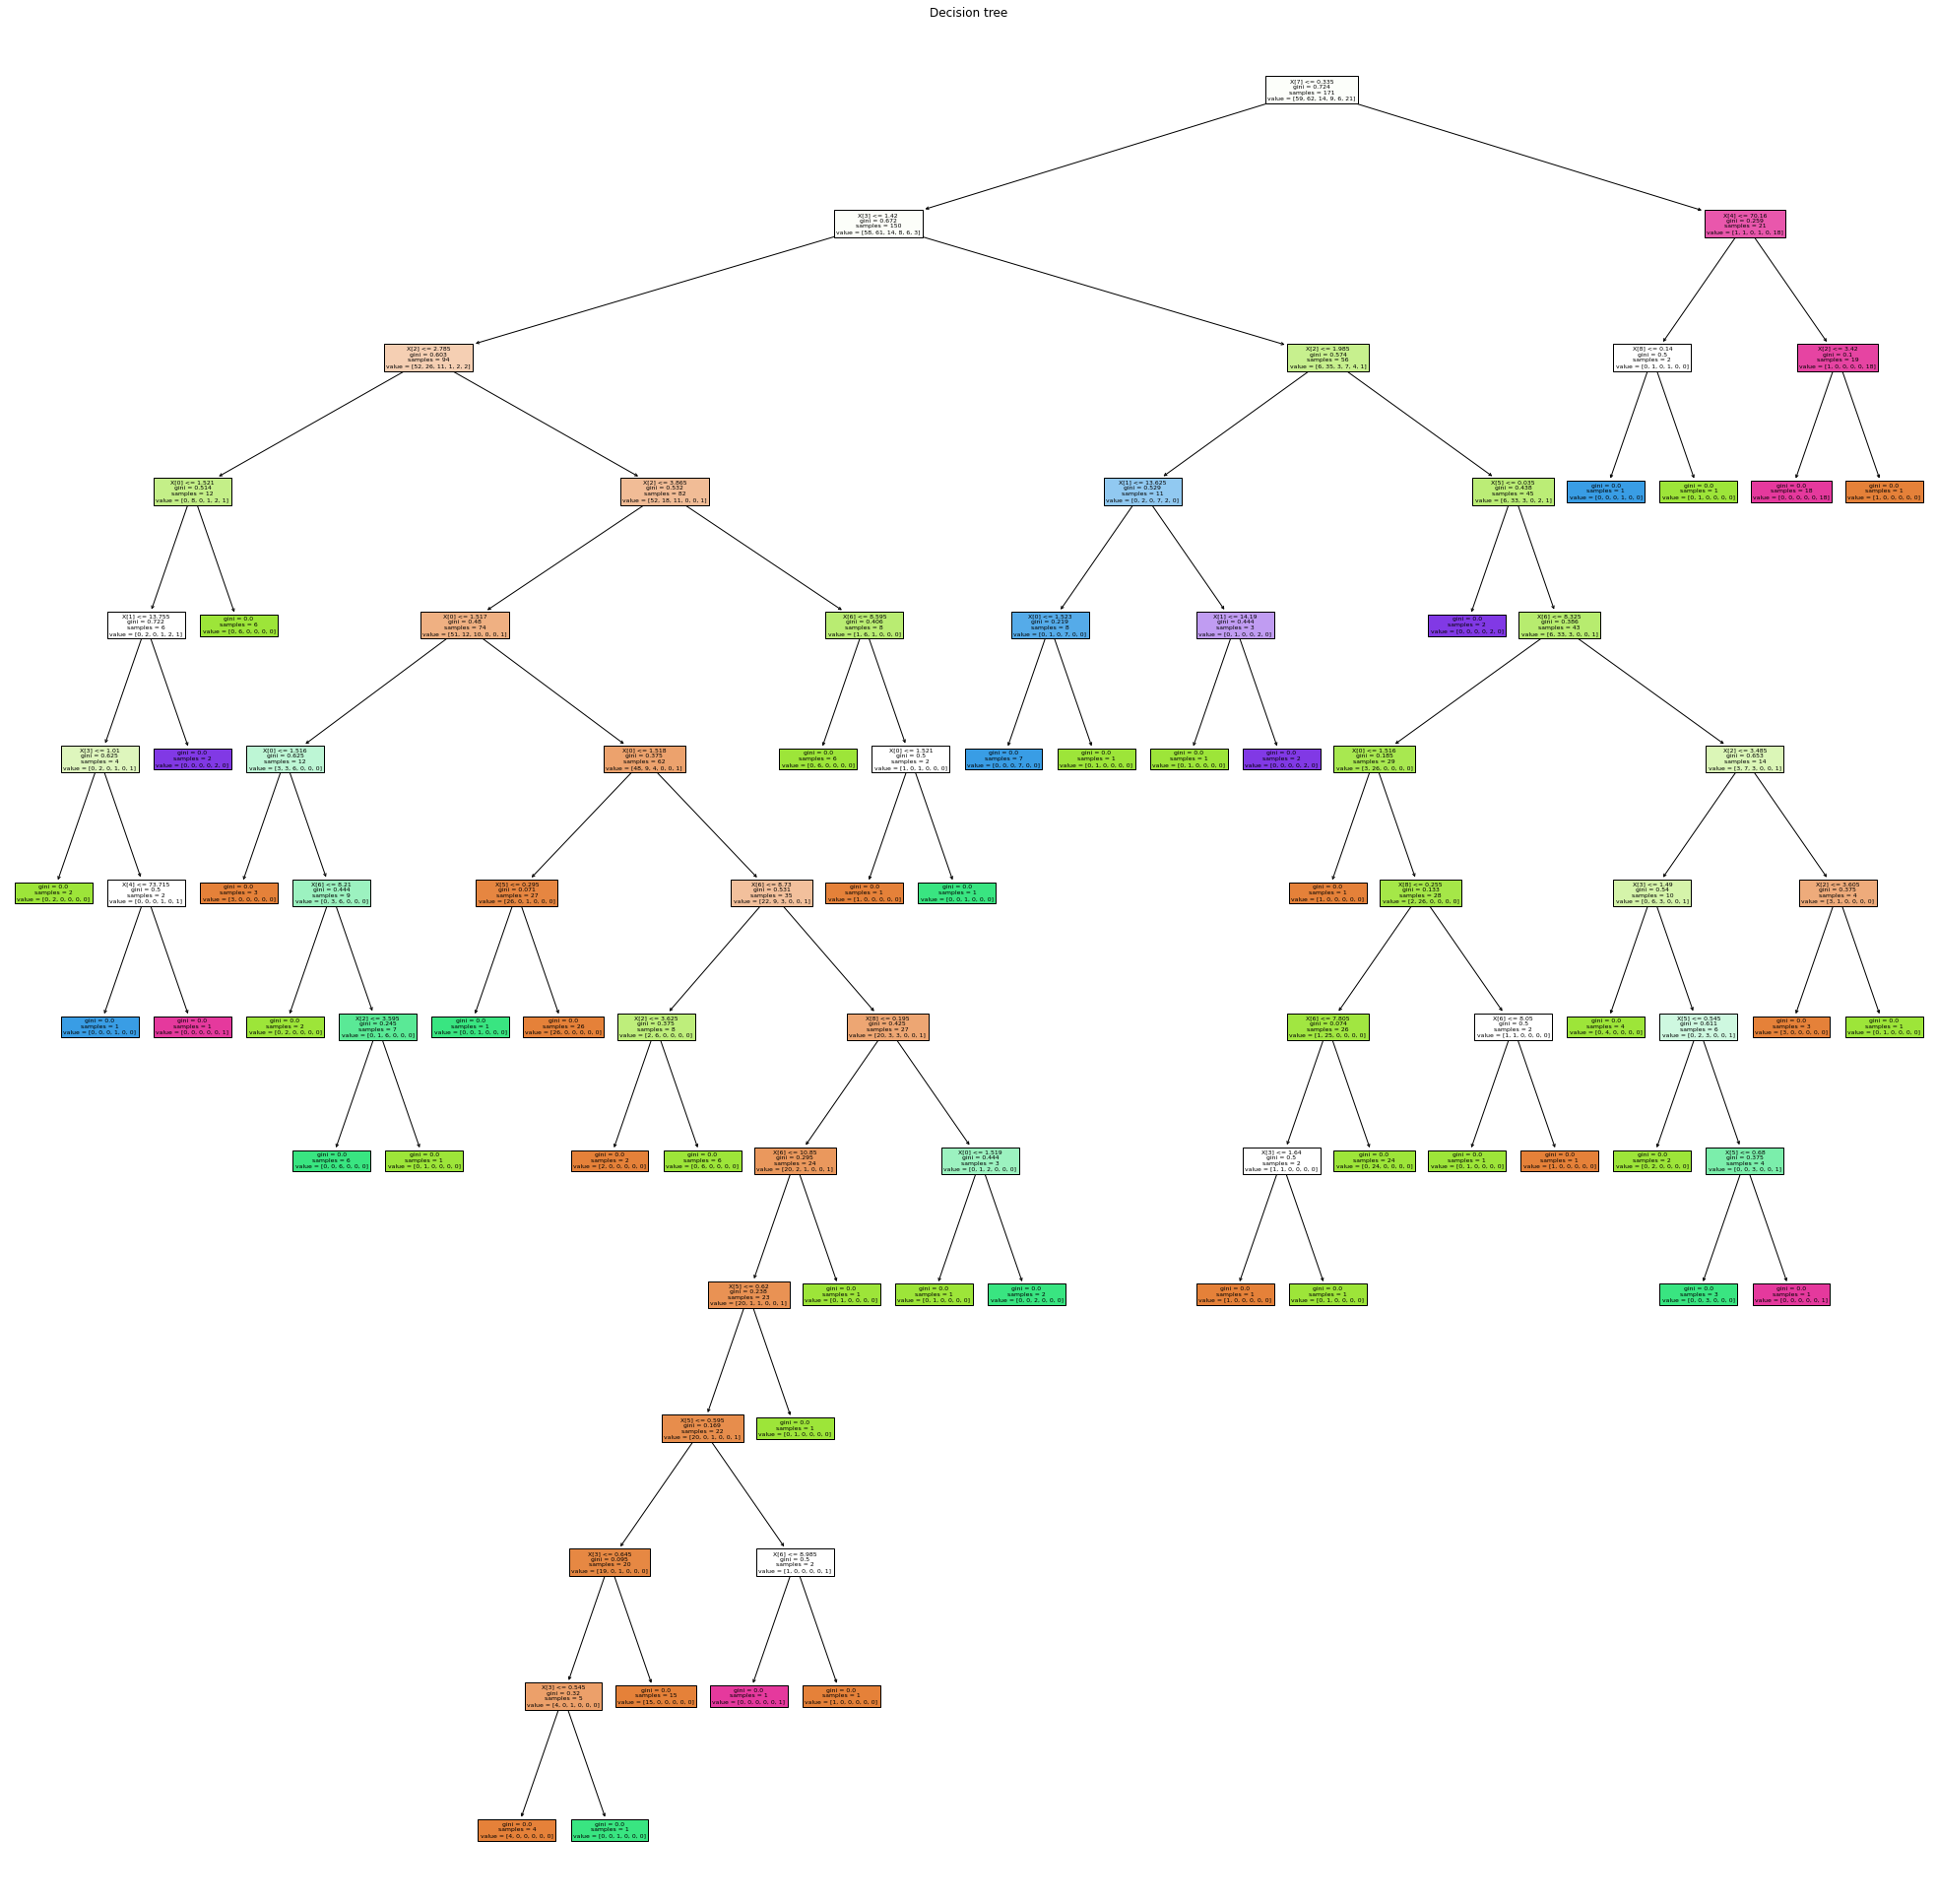

In [4]:
plt.figure(figsize=(35,35))
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)
plot_tree(clf, filled=True)
plt.title('Decision tree')
plt.show()

In [5]:
y_pred = clf.predict(test_X)
print('accuracy ', accuracy_score(test_y, y_pred))
clf.get_depth()

accuracy  0.7674418604651163


13

In [25]:
splitter = ['best', 'random']
accuracy = {'best': 0,
           'random': 0
           }
k = 1000

for split in splitter:
    for i in range(k):
        tree = DecisionTreeClassifier(splitter=split)
        tree.fit(train_X, train_y)

        pred_y = tree.predict(test_X)
        acc = accuracy_score(test_y, pred_y)

        accuracy[split]+= acc/k

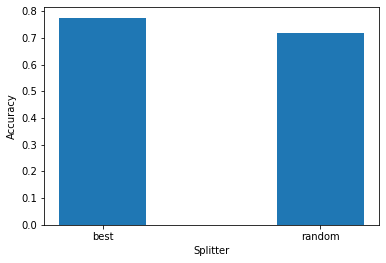

In [42]:
plt.bar(splitter, list(accuracy.values()), width=0.4)
plt.xticks(range(len(splitter)), splitter)
plt.xlabel('Splitter')
plt.ylabel('Accuracy')
plt.show()

In [63]:
max_depth = [i for i in range(1, 100, 5)]
accuracy_md = dict()

k = 1000
for i in range(k):
    for depth in max_depth:
        tree = DecisionTreeClassifier(max_depth=depth)
        tree.fit(train_X, train_y)

        pred_y = tree.predict(test_X)
        acc = accuracy_score(test_y, pred_y)

        if depth in accuracy_md.keys():
            accuracy_md[depth] += acc/k
        else:
            accuracy_md[depth] = acc/k

In [64]:
accuracy_md

{1: 0.5116279069767351,
 6: 0.7431627906976745,
 11: 0.7715581395348811,
 16: 0.7741627906976708,
 21: 0.7729302325581375,
 26: 0.773348837209299,
 31: 0.7730465116279028,
 36: 0.7733023255813914,
 41: 0.7739767441860426,
 46: 0.7726279069767406,
 51: 0.7733488372092994,
 56: 0.7747209302325552,
 61: 0.7704651162790664,
 66: 0.7729534883720901,
 71: 0.7729534883720895,
 76: 0.7726511627906953,
 81: 0.7742093023255768,
 86: 0.7729069767441831,
 91: 0.7729534883720905,
 96: 0.7736744186046483}

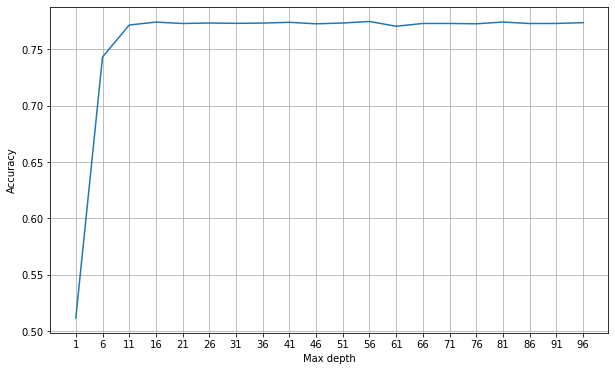

In [72]:
plt.figure(figsize=(10,6))
plt.plot(list(accuracy_md.values()))
plt.xticks(range(len(max_depth)), max_depth)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [97]:
min_samples_leaf = [i for i in range(2, 100, 5)]
accuracy_leaf = dict()

k = 100
for i in range(k):
    for leaf in min_samples_leaf:
        tree = DecisionTreeClassifier(min_samples_leaf=leaf)
        tree.fit(train_X, train_y)

        pred_y = tree.predict(test_X)
        acc = accuracy_score(test_y, pred_y)

        if depth in accuracy_leaf.keys():
            accuracy_leaf[leaf] += acc
        else:
            accuracy_leaf[leaf] = acc

In [98]:
accuracy_leaf

{2: 0.6976744186046512,
 7: 0.7906976744186046,
 12: 0.7674418604651163,
 17: 0.7209302325581395,
 22: 0.6511627906976745,
 27: 0.6046511627906976,
 32: 0.6046511627906976,
 37: 0.6046511627906976,
 42: 0.6046511627906976,
 47: 0.5581395348837209,
 52: 0.5116279069767442,
 57: 0.4186046511627907,
 62: 0.46511627906976744,
 67: 0.46511627906976744,
 72: 0.46511627906976744,
 77: 0.46511627906976744,
 82: 0.4418604651162791,
 87: 0.32558139534883723,
 92: 0.32558139534883723,
 97: 0.32558139534883723}

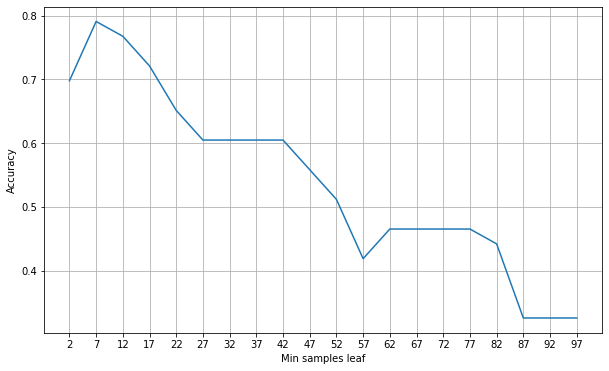

In [99]:
plt.figure(figsize=(10,6))
plt.plot(list(accuracy_leaf.values()))
plt.xticks(range(len(min_samples_leaf)), min_samples_leaf)
plt.xlabel('Min samples leaf')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [118]:
criterion = ['gini', 'entropy']
accuracy_crit = {'gini': 0,
               'entropy': 0
           }
k = 1000

for crit in criterion:
    for i in range(k):
        tree = DecisionTreeClassifier(criterion=crit)
        tree.fit(train_X, train_y)

        pred_y = tree.predict(test_X)
        acc = accuracy_score(test_y, pred_y)

        accuracy_crit[crit] += acc/k

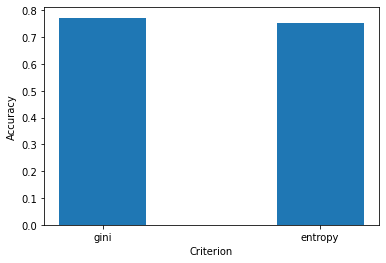

In [119]:
plt.bar(criterion, list(accuracy_crit.values()), width=0.4)
plt.xticks(range(len(criterion)), criterion)
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.show()

## B

In [106]:
spam = pd.read_csv('spam7.csv')

yn_map = {'y': 1, 'n': -1}
spam['yesno'] = spam['yesno'].map(yn_map)

X_spam = spam.drop('yesno', axis=1)
y_spam = spam.yesno

train_X_spam, test_X_spam, train_y_spam, test_y_spam = train_test_split(X_spam, y_spam, train_size=0.8, random_state=42)

In [140]:
spam.describe()

,crl.tot,dollar,bang,money,n000,make,yesno
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553,-0.211910
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358,0.977395
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000,1.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000,1.000000


In [126]:
tree = DecisionTreeClassifier()
tree.fit(train_X_spam, train_y_spam)

pred = tree.predict(test_X_spam)

acc = accuracy_score(test_y_spam, pred)

In [128]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': np.arange(1, 30, 3),
    'splitter': ['best'],
    'min_samples_leaf': np.arange(2, 50, 4),
    'criterion': ['gini', 'entropy'],
}
clf = DecisionTreeClassifier()
tree_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)

tree_grid.fit(X_spam, y_spam)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28]),
                         'min_samples_leaf': array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46]),
                         'splitter': ['best']},
             scoring='accuracy')

In [130]:
tree.get_depth()

25

In [133]:
tree_grid.best_params_, tree_grid.best_score_, tree_grid.best_estimator_

({'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 34,
  'splitter': 'best'},
 0.8678529953264409,
 DecisionTreeClassifier(max_depth=10, min_samples_leaf=34))

In [135]:
best_tree = tree_grid.best_estimator_

best_tree.fit(train_X_spam, train_y_spam)

b_pred = best_tree.predict(test_X_spam)

b_acc = accuracy_score(test_y_spam, b_pred)

In [137]:
b_acc, acc

(0.8545059717698155, 0.8360477741585234)

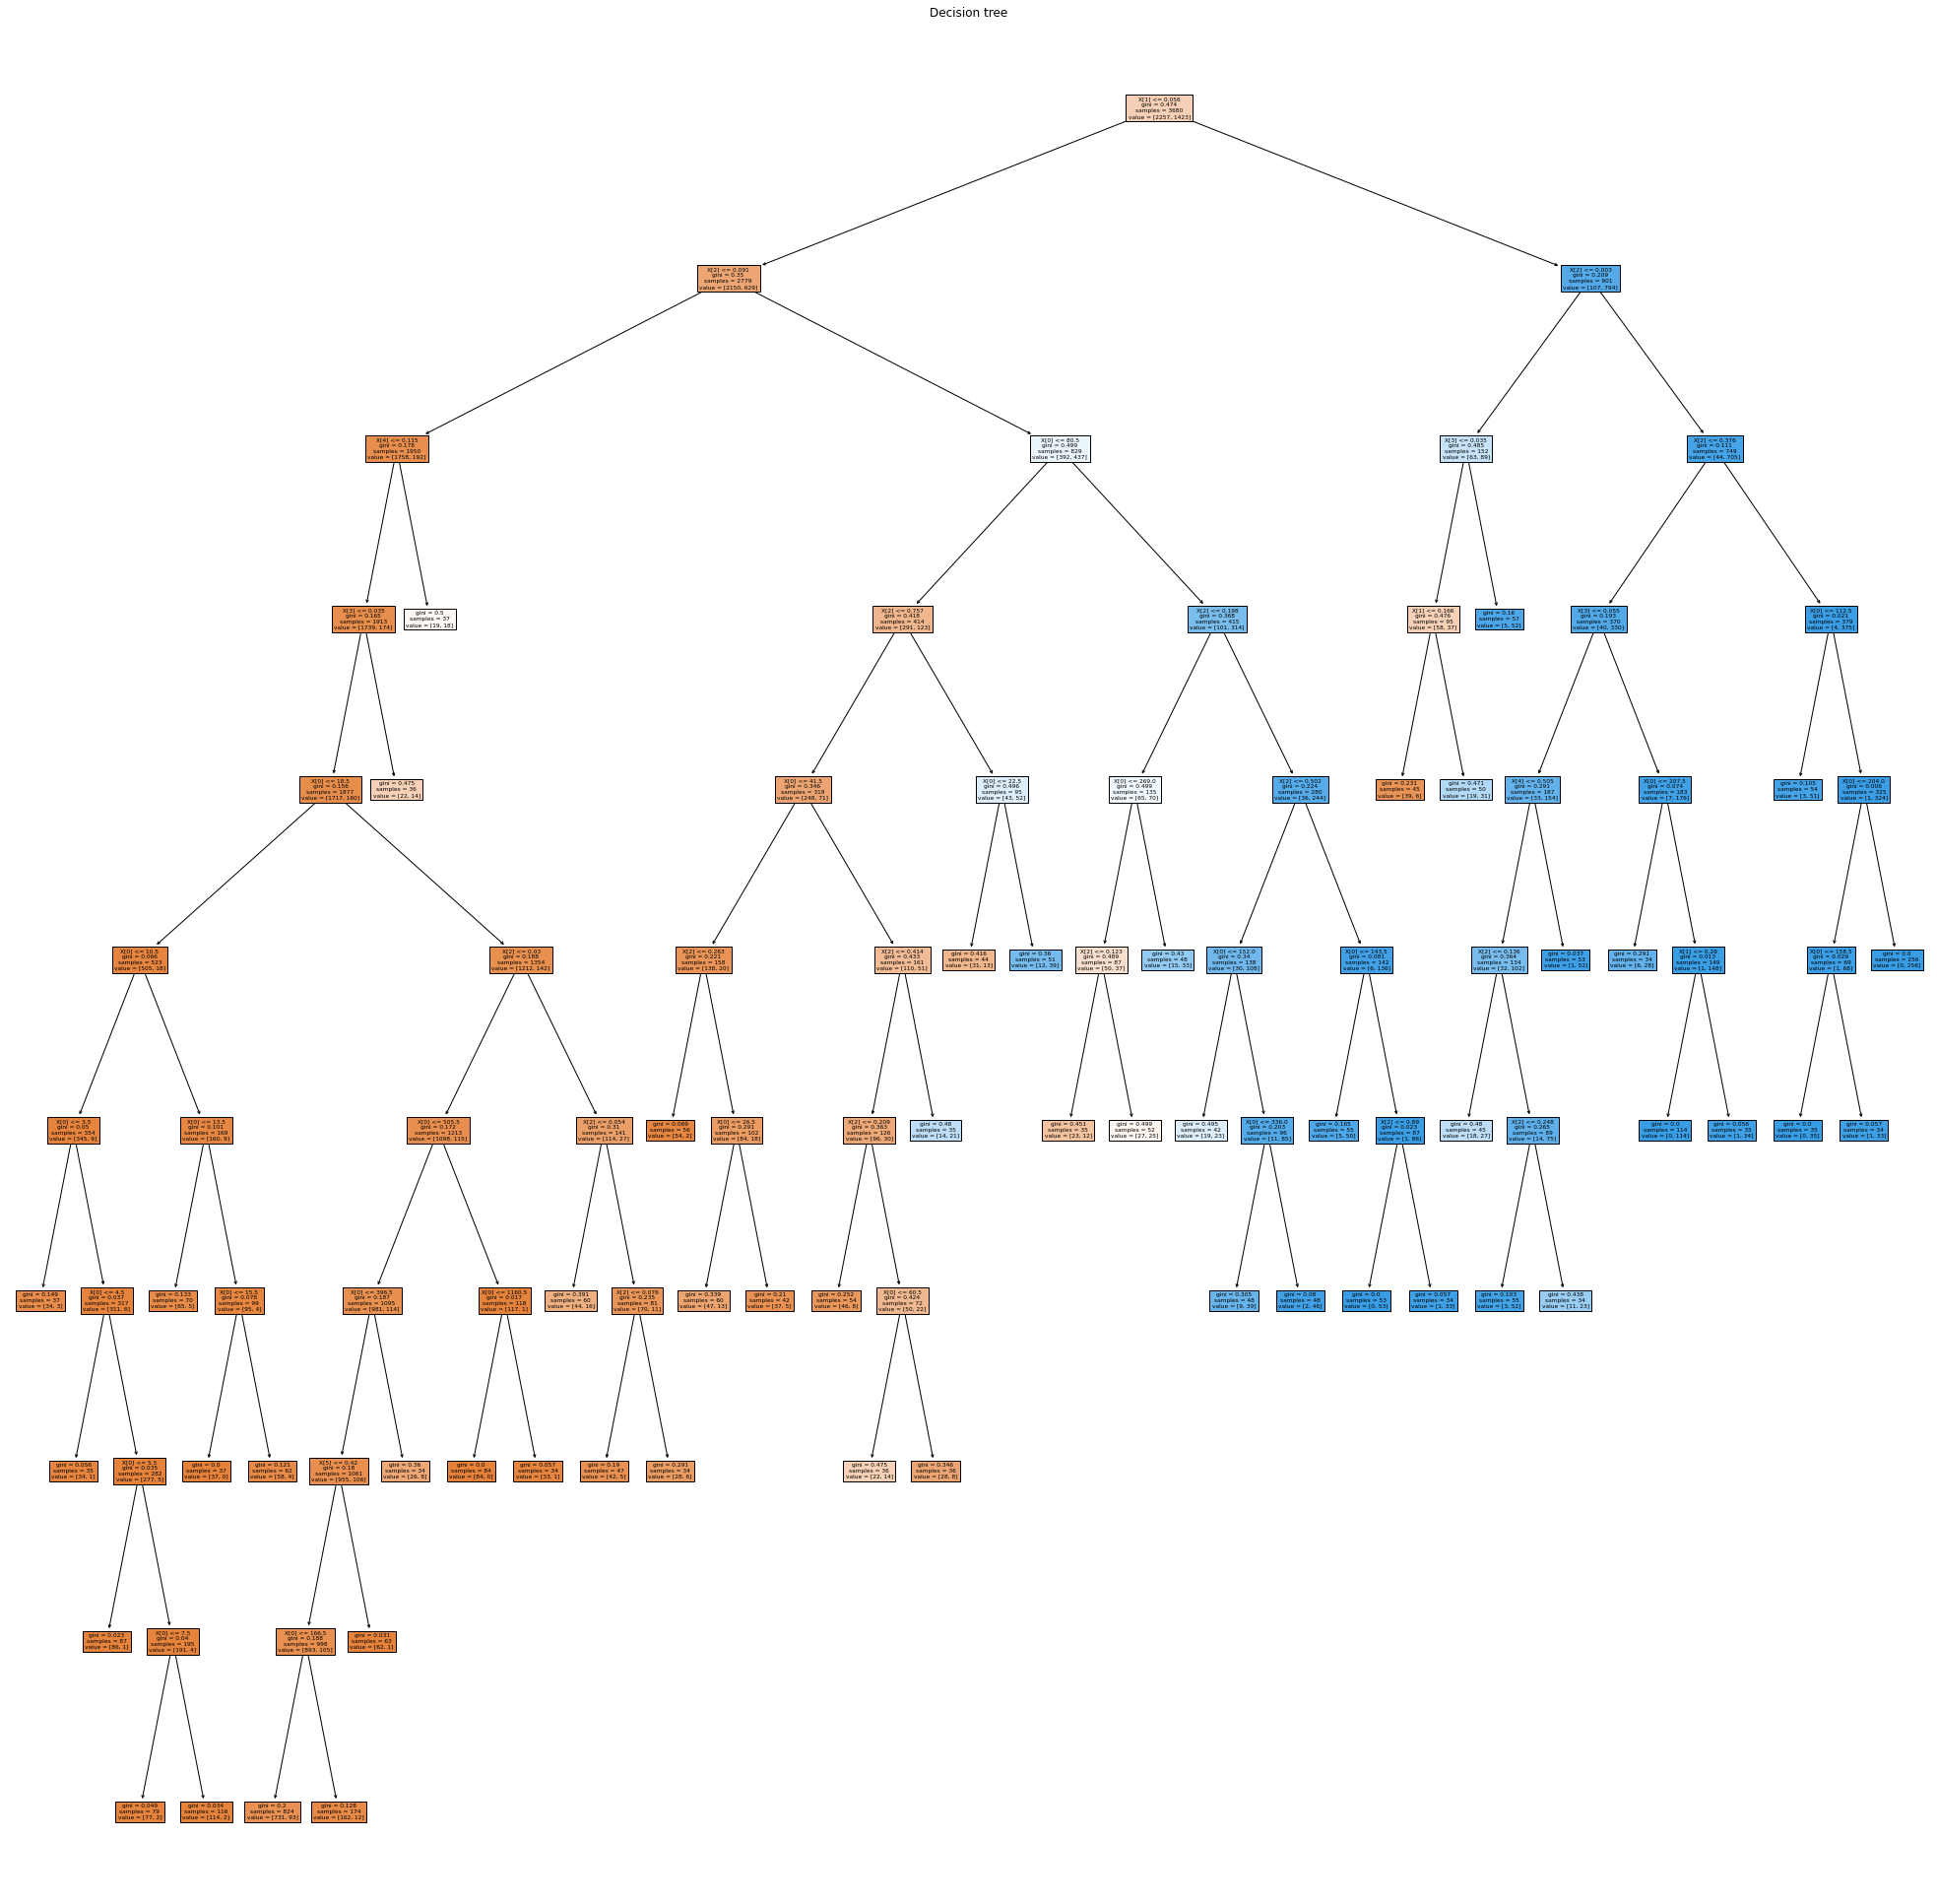

In [138]:
plt.figure(figsize=(35,35))
plot_tree(best_tree, filled=True)
plt.title('Decision tree')
plt.show()